In [14]:
from myst_nb import glue # for the Jupyter book chapter

# Describing Data

```{note}
This chapter by [Todd M. Gureckis](https://gureckislab.org/~gureckis) and is released under the [license for this book](../../LICENSE). Elements of this chapter are adapted from Matthew Crump's excellent [Answering questions with data](https://crumplab.github.io/statistics/) book {cite}`Crump2019` which also draws from from Danielle Navarro's excellent [Learning Statistics with R](https://learningstatisticswithr.com) book {cite}`Navarro2011`.  One major change is the code was adapted to use python and jupyter.  In addition the introduction was replaced/shortened.  A chapter on descriptive statistics and correlation were merged.
```

We previously considered ways to visualize data using computer graphics.  Visualizations help us see patterns in data and to verify our understanding.  Visualization also sometimes help to summarize data in a more compact form than looking at the raw data.  However, in some cases it is more precise to summarize our data using numbers which we call **descriptive statistics**.  

Descriptive statistics are probably the simplest and most straightforward aspect of statistical data analysis.  We are simplying taking a collection of numbers and computing a new number which summarizes the data in some way.  There are many different descriptive statistics and which is most appropriate depends a lot on the nature of the data and what you want to communicate about the data to others.  Simply put, a descriptive statistic is a number, computed on a collection of numbers (i.e., data), that captures something important about the data.  

<div style="text-align: center">
    <img src="./images/descriptivestats.png" width="500">
</div>

Academic papers in psychology are littered with descriptive statitics even if inferential statistics (things we will discuss later) end up being the "flashiest" findings.  We need descriptive statistics to tell readers of our papers or audience members at our talks/posters what basically went on in a dataset without showing them all of the data or giving too many plots/visualizations.  Descriptive statistics tend to be quick, easy to convey summaries.  In addition, since they are usually numbers, they admit easy comparison to one another.

There are lots of different descriptive statistics.  The one you are perhaps most familiar with is the arithmetic average or _mean_ (e.g., when you compute your average grade for the class it summarizes your performance in the class across many different assignments).  However there are many others we will discuss, and it fact it is possible to compute new statistics yourself!  

Most of the statistical concepts in this chapter should be review if you have taken an introductory statistics course in psychology.  What you will learn by reading carefully is how to easily compute descriptive statistics for different datasets using Python and Pandas, a review of the merits and meaning of various statistics, and how to report them in papers and talks.

## Example Dataset

We begin by loading an example dataset into a Pandas dataframe that we will use as an example throughout this chapter.  

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
df = pd.read_csv('https://tinyurl.com/yya6yyt8')

```{admonition} About the data
:class: tip

The data is from the [OMNI](http://gureckislab.org/omni/index.html) project which examines how people learn and forget information.  In this specific dataset a set of participants studied a list of 45 Lithuanian-English vocabulary words five times for each word.  Immediately after study, participant gave each word pair a "judgement-of-learning" (JOL) rating of how likely they felt they would remember this pair at a later test.  They then came back for a test session several hours later (depending on a between-subject condition) and were presented with the Lithuanian word of each pair and asked to type in the corresponding English word.

The columns of the dataset are as follows:

* `delay_group`: the approximate time betwen the study to recall test for this participant (Note that the exact time between study and test for a particular person should be obtained from the included timestamps)
    * A: immediate recall after end of study and JOL blocks
    * C: 24h study-recall lag
    * E: 48h study-recall lag (n = 1, due to an error)
    * F: 72h study-recall lag
    * PRISMAF: 72h study-recall lag (study session in an MRI scanner)
    * H: 168h study-recall lag
   
   
* `participant_id`: unique identifier for each participant (delay-group + numeric)


* `lith_word_studied`: the lithuanian word in a studied pair


* `eng_word_studied`: the english word in a studied pair


* `studyN_start`: a numeric timestamp in seconds for the start time of study trial N  (Note that all study events were four seconds duration)


* `jol_start`: a numeric timestamp in seconds for the start time of the JOL trial


* `recall_trial`: a numeric timestamp in seconds for the start time of the recall trial


* `jol_value`: numeric responses from 0-100 indicating confidence that a given word will be remembered


* `eng_word_response`: the participant's english response for a given recall test trial


* `recall_accuracy`: the participant's recall accuracy


* `study_test_lag`: the time between the 5th study repetition and the recall trial for the given word
```

We can first verify the columns and type of data within each column of the loaded dataframe.

In [6]:
df.head()

,lith_word_studied,eng_word_studied,participant_id,delay_group,study1_start,study2_start,study3_start,study4_start,study5_start,jol_start,recall_start,jol_value,eng_word_response,recall_accuracy,study_test_lag
0,pastatas,building,A1,A,1461597222,1461598097,1461598653,1461599383,1461599951,1461600711,1461601222,100,building,1,21.183333
1,mesa,meat,A1,A,1461597234,1461598070,1461598710,1461599353,1461599975,1461600707,1461601232,100,meat,1,20.950000
2,kreida,chalk,A1,A,1461597248,1461598054,1461598669,1461599403,1461599965,1461600699,1461601238,75,sword,0,21.216667
3,bugnas,drum,A1,A,1461597262,1461598085,1461598683,1461599393,1461599985,1461600719,1461601235,100,drum,1,20.833333
4,muilas,soap,A1,A,1461597274,1461598111,1461598700,1461599369,1461599995,1461600716,1461601249,100,soap,1,20.900000


We will start with a very simple and broad approach to computing descriptive statistics using the `.describe()` method of Pandas.  This function computes several descriptive statistics for each column of a dataset.  Which statistics is computed in the output depends somewhat on the nature of the dataset.

In [7]:
df.describe()

,study1_start,study2_start,study3_start,study4_start,study5_start,jol_start,recall_start,jol_value,recall_accuracy,study_test_lag
count,8.550000e+03,8.550000e+03,8.550000e+03,8.550000e+03,8.550000e+03,8.550000e+03,8.550000e+03,8550.000000,8550.000000,8550.000000
mean,1.481107e+09,1.481108e+09,1.481109e+09,1.481109e+09,1.481110e+09,1.481111e+09,1.481385e+09,61.665146,0.418129,4583.718248
std,1.244130e+07,1.244130e+07,1.244131e+07,1.244130e+07,1.244130e+07,1.244149e+07,1.248592e+07,31.876645,0.493280,3585.115929
min,1.461597e+09,1.461598e+09,1.461599e+09,1.461599e+09,1.461600e+09,1.461601e+09,1.461601e+09,0.000000,0.000000,10.050000
25%,1.471894e+09,1.471895e+09,1.471896e+09,1.471897e+09,1.471897e+09,1.471898e+09,1.472154e+09,37.000000,0.000000,1405.112500
50%,1.479028e+09,1.479029e+09,1.479030e+09,1.479030e+09,1.479031e+09,1.479032e+09,1.479421e+09,66.000000,0.000000,4268.191666
75%,1.488220e+09,1.488221e+09,1.488221e+09,1.488222e+09,1.488222e+09,1.488223e+09,1.488492e+09,91.000000,1.000000,9983.912500
max,1.516474e+09,1.516475e+09,1.516475e+09,1.516476e+09,1.516477e+09,1.516478e+09,1.516735e+09,100.000000,1.000000,11518.816670


If you look at the rows of the resulting dataframe the include the `count` (the number of rows in that column), `std` the standard deviaion of the values, `min` the minimum value in the column, `50%` which is the median (and `25%` and `75%` which show alternative quartiles), the `mean`, and the `max`.

Also note that several columns in the original dataframe such as `participant_id` is missing from this output.  This is because the set of descriptive statistics here only apply to columns made up with real numbers (you can't take the mean of a string).  To get descriptive statistics for individual columns we can first _select_ a column and then do `.describe()`.

In [9]:
df['participant_id'].describe()

count     8550
unique     190
top        H47
freq        45
Name: participant_id, dtype: object

The statistics for discrete data include the number of rows (`count`), the number of unique values (`unique`), the most frequent value (`H47`), and the frequency of the most common elements (`freq`).  From this we can see there is 190 participants in this data set and 8550 trials.

The `.describe()` dataframe method is sort of the "ultra-simple" descriptive statistic function.  However as we will step through in the following sections there are specific methods for specific statistics as well as the ability to write your own custom descriptive statistics.  As one example `.mean()` computes the mean within each column (if the column is a number and not a string):

In [12]:
df.mean()

study1_start       1.481107e+09
study2_start       1.481108e+09
study3_start       1.481109e+09
study4_start       1.481109e+09
study5_start       1.481110e+09
jol_start          1.481111e+09
recall_start       1.481385e+09
jol_value          6.166515e+01
recall_accuracy    4.181287e-01
study_test_lag     4.583718e+03
dtype: float64

## Measures of Central Tendency

Measures of central tendency have one important summary goal: to reduce a pile of numbers to a single number that summarizes in some sense the average or typical value. Take a moment here to listen to this interesting National Public Radio [Planet Money](https://www.npr.org/sections/money/) podcast about "the modal american" which discusses exactly how difficult it can be to compute the average or typical value of some population or dataset.  After you listen, test your understanding with the questions below.

<iframe src="https://www.npr.org/player/embed/755191639/755262760" width="100%" height="290" frameborder="0" scrolling="no" title="NPR embedded audio player"></iframe>

```{admonition} Test yourself: What is the median age of an American?
:class: hint
- 26
- 38
- 56
- 78
```
```{admonition} Click the button to reveal the answer!
:class: dropdown
Around 5:52 in the podcast they discuss the distribution of ages in the American population, and the bimodal hump which is the Millenials ("echo boomers") and the Boomers.  The median age is 38 but their analysis but fewer Americans are this age.  The most common (modal) age is 26.
```

```{admonition} Test yourself: When they analyze data in terms of multiple traits and category "buckets" who was the modal American?
:class: hint
- a child, gen-z, unmarried, no college degree, unemployed
- a college student, married, mid-20s
- a retiree, late 60s, unmarried, college educated
```
```{admonition} Click the button to reveal the answer!
:class: dropdown
Around 13:47 in the podcast they discuss that all the children in the US fall into one of the categories because the categories were slanted towards adults (employed, college, etc...).
The modal american in their analysis actually is male, gen-x, 39-54 years old, lives in suburbs, did not complete college, white, married, working full time, household income \$75-165k/year.  Partly because this middle age generation is more homogenous (generally working full-time, etc...) while older and younger generations have more varied work and marriage relationships.
```

Ok with some of the trickiness of defining a central tendency for real data, let's look at the traditional statistics for this.


### Mode

The **mode** is the most frequently occurring number in your measurement. That is it. How do you find it? You have to count the number of times each number appears in your measure, then whichever one occurs the most, is the mode.

> Example: 1 1 1 2 3 4 5 6

The mode of the above set is 1, which occurs three times. Every other number only occurs once.

OK fine. What happens here:

> Example: 1 1 1 2 2 2 3 4 5 6

Hmm, now 1 and 2 both occur three times each. What do we do? We say there are two modes, and they are 1 and 2.

Why is the mode a measure of central tendency? Well, when we ask, "what are my numbers like", we can say, "most of the number are, like a 1 (or whatever the mode is)".

Is the mode a good measure of central tendency? That depends on your numbers. For example, consider these numbers

> 1 1 2 3 4 5 6 7 8 9

Here, the mode is 1 again, because there are two 1s, and all of the other numbers occur once. But, are most of the numbers like, a 1. No, they are mostly not 1s. 


When is the mode a good summary of a set of data?  Well generally mode is useful for things that have a chance of repeating.  For instance since we usually think of people's age in whole numbers (36, 24, 56, etc...) then we can find the modal age to find the most common age.  However, it might make less sense on more fine-grained measurements.  For instance if you recorded the altitude of every US city to the closest millimeter it might not make sense to report the mode since at the scale of a millimeter maybe very few cities have the same value (and thus there are many modes with only one occurence).  As the podcast above points out the mode is good for gauging "who is most common/typical in a population" and that is why talking about the "modal american" is an appealing statistical concept.

How do we compute the mode in Pandas.  Well you saw already that when you call `.describe()` on a column that has nominal (i.e., string data) it reports the most common value or mode.  You can request this statistic directly like this:

In [20]:
df['jol_value'].mode()

0    100
dtype: int64

This shows us that 100 is the most common judgment of learning (JOL) rating that people gave overall.  If we ask for the modal `participant_id` that is the id of the subject with the most trials in the data frame (i.e., they appear in the most rows).  However, since all subjects had exactly 45 trials there are multiple modes in the participant id column.  In fact if we run that command we get 190 different modes each picking out a different subject with 45 trials.

In [21]:
df['participant_id'].mode()

0             A1
1            A10
2            A11
3            A12
4            A13
         ...    
185    PRISMAF28
186    PRISMAF29
187    PRISMAF30
188    PRISMAF31
189    PRISMAF32
Length: 190, dtype: object

The mode is the **value** which is most common.  Sometimes you want to know how often the modal value appears.  The `.value_counts()` function computes a tally of how often each value repeats in a list sorted from biggest to largest. 

In [27]:
df['jol_value'].value_counts()

100    1616
50      370
80      324
90      308
70      302
       ... 
12       23
3        22
17       20
2        20
27       17
Name: jol_value, Length: 101, dtype: int64

 Thus the first entry of this series shows that the value 100 appears 1616 times.  It also shows the second most common rating is 50 which appears 370 times.  If you only one the count for the mode there a few tricks you could do, e.g., we can use `.iat[0]` to extract the first entry to the `.value_counts()`:

In [30]:
df['jol_value'].value_counts().iat[0]

1616

### Median

The **median** is the exact middle of the data. After all, we are asking about central tendency, so why not go to the center of the data and see where we are. What do you mean middle of the data? Let's look at these numbers:

> 1 5 4 3 6 7 9

Umm, OK. So, three is in the middle? Isn't that kind of arbitrary. Yes. Before we can compute the median, we need to order the numbers from smallest to largest.

> 1 3 4 **5** 6 7 9

Now, 5 is in the middle. And, by middle we mean in the middle. There are three numbers to the left of 5, and three numbers to the right. So, five is definitely in the middle.

OK fine, but what happens when there aren't an even number of numbers? Then the middle will be missing right? Let's see:

> 1 2 3 4 5 6

There is no number between 3 and 4 in the data, the middle is empty. In this case, we compute the median by figuring out the number in between 3 and 4. So, the median would be 3.5.

Is the median a good measure of central tendency? Sure, it is often very useful. One property of the median is that it stays in the middle even when some of the other numbers get really weird. For example, consider these numbers:

> 1 2 3 4 4 4 **5** 6 6 6 7 7 1000

Most of these numbers are smallish, but the 1000 is a big old weird number, very different from the rest. The median is still 5, because it is in the middle of these ordered numbers. We can also see that five is pretty similar to most of the numbers (except for 1000). So, the median does a pretty good job of representing most of the numbers in the set, and it does so even if one or two of the numbers are very different from the others.

Finally, **outlier** is a term will we use to describe numbers that appear in data that are very different from the rest. 1000 is an outlier, because it lies way out there on the number line compared to the other numbers. What to do with outliers is another topic we discuss later.



We can compute the median of a single column just like we computed the mean using Pandas:

In [31]:
df['jol_value'].median()

66.0

As you can see the median is quite different than the mode.  The most common JOL rating was 100 but the median is 66!

### Mean

Perhaps the most well known measure of central tendency is the **mean** or arithmetic average.  It is best represented as a formula where we sum up the numbers then divide by the number of numbers:

$Mean = \bar{X} = \frac{\sum_{i=1}^{n} x_{i}}{N}$

The $\sum$ symbol is called **sigma**, and it stands for the operation of summing. The little "i" on the bottom, and the little "n" on the top refers to all of the numbers in the set, from the first number "i" to the last number "n". The letters are just arbitrary labels, called **variables** that we use for descriptive purposes. The $x_{i}$ refers to individual numbers in the set. We sum up all of the numbers, then divide the sum by $N$, which is the total number of numbers. Sometimes you will see $\bar{X}$ to refer to the mean of all of the numbers.

In plain English, the formula looks like:

$mean = \frac{\text{Sum of my numbers}}{\text{Count of my numbers}}$

Let's compute the mean for these five numbers:

> 3 7 9 2 6

Add em up:

> 3+7+9+2+6 = 27

Count em up:

> $i_{1}$ = 3, $i_{2}$ = 7, $i_{3}$ = 9, $i_{4}$ = 2, $i_{5}$ = 6; N=5, because $i$ went from 1 to 5

Divide em:

> mean = 27 / 5 = 5.4

Or, to put the numbers in the formula, it looks like this:

$Mean = \bar{X} = \frac{\sum_{i=1}^{n} x_{i}}{N} = \frac{3+7+9+2+6}{5} = \frac{27}{5} = 5.4$



> Pro tip: The mean is the one and only number that can take the place of every number in the data, such that when you add up all the equal parts, you get back the original sum of the data.


Computing the mean of a column in Pandas is trivial:

In [33]:
df['jol_value'].mean()

61.665146198830406

or all columns:

In [34]:
df.mean()

study1_start       1.481107e+09
study2_start       1.481108e+09
study3_start       1.481109e+09
study4_start       1.481109e+09
study5_start       1.481110e+09
jol_start          1.481111e+09
recall_start       1.481385e+09
jol_value          6.166515e+01
recall_accuracy    4.181287e-01
study_test_lag     4.583718e+03
dtype: float64

### Mean, median or mode? What's the difference? When should I use one or the other?

```{figure} ./images/meanmedian.png
:width: 500px
:name: fig:meanmedian

Illustration of the intuitive difference between the mean and median
```

Knowing how to calculate means and medians is only a part of the story. You also need to understand what each one is saying about the data, and what that implies for when you should use each one. This is illustrated in {numref}`fig:meanmedian` the mean is kind of like the "centre of gravity" of the data set, whereas the median is the "middle value" in the data. What this implies, as far as which one you should use, depends a little on what type of data you've got and what you're trying to achieve. As a rough guide:
 
- If your data are nominal scale, you probably shouldn't be using either the mean or the median. Both the mean and the median rely on the idea that the numbers assigned to values are meaningful. If the numbering scheme is arbitrary, then it's probably best to use the mode instead. 
- If your data are ordinal scale, you're more likely to want to use the median than the mean. The median only makes use of the order information in your data (i.e., which numbers are bigger), but doesn't depend on the precise numbers involved. That's exactly the situation that applies when your data are ordinal scale. The mean, on the other hand, makes use of the precise numeric values assigned to the observations, so it's not really appropriate for ordinal data.
- For interval and ratio scale data, either one is generally acceptable. Which one you pick depends a bit on what you're trying to achieve. The mean has the advantage that it uses all the information in the data (which is useful when you don't have a lot of data), but it's very sensitive to extreme values.  


Let's expand on that last part a little. One consequence is that there's systematic differences between the mean and the median when the histogram is asymmetric (also known as "skewed"). This is illustrated in {numref}`fig:meanmedian` notice that the median (right hand side) is located closer to the "body" of the histogram, whereas the mean (left hand side) gets dragged towards the "tail" (where the extreme values are). To give a concrete example, suppose Bob (income \$50,000), Kate (income \$60,000) and Jane (income \$65,000) are sitting at a table: the average income at the table is \$58,333 and the median income is \$60,000. Then Bill sits down with them (income \$100,000,000). The average income has now jumped to \$25,043,750 but the median rises only to \$62,500. If you're interested in looking at the overall income at the table, the mean might be the right answer; but if you're interested in what counts as a typical income at the table, the median would be a better choice here.

## Measures of variability

The statistics that we've discussed so far all relate to *central tendency*. That is, they all talk about which values are "in the middle" or "popular" in the data. However, central tendency is not the only type of summary statistic that we want to calculate. The second thing that we really want is a measure of the **_variability_** of the data. That is, how "spread out" are the data? How "far" away from the mean or median do the observed values tend to be? 

### Range

The **_range_** of a variable is very simple: it's the biggest value minus the smallest value. For the OMNI JOL data, the maximum value is 100, and the minimum value is 0. We can calculate these values in R using the `max()` and `min()` functions:

In [44]:
df['jol_value'].max()

100

In [53]:
df['jol_value'].min()

0

In [54]:
range_vals = df['jol_value'].max()-df['jol_value'].min()
range_vals

100

Although the range is the simplest way to quantify the notion of "variability", it's one of the worst. We generally want our summary measure to be "robust" to outliers. If the data set has one or two extremely weird values in it, we'd like our statistics not to be unduly influenced by these cases. If we look once again at our toy example of a data set containing very extreme outliers...

$-100,2,3,4,5,6,7,8,9,10$

... it is clear that the range is not robust, since this has a range of 110, but if the outlier were removed we would have a range of only 8.



### Interquartile range

The **_interquartile range_** (IQR) is like the range, but instead of calculating the difference between the biggest and smallest value, it calculates the difference between the 25th quantile and the 75th quantile. Probably you already know what a **_quantile_** is (they're more commonly called percentiles), but if not: the 10th percentile of a data set is the smallest number $x$ such that 10% of the data is less than $x$. In fact, we've already come across the idea: the median of a data set is its 50th quantile / percentile! Pandas actually provides you with a way of calculating quantiles, using the (surprise, surprise) `.quantile()` function. Let's use it to calculate the median JOL in the OMNI dataset:

In [56]:
df['jol_value'].median()

66.0

In [48]:
df['jol_value'].quantile(q=0.5)

66.0

And not surprisingly, this agrees with the answer that we saw earlier with the `.median()` function. Now, we can actually input lots of quantiles at once, by specifying a list for the `probs` argument. So lets do that, and get the 25th and 75th percentile:

In [50]:
df['jol_value'].quantile(q=[0.25,0.75])

0.25    37.0
0.75    91.0
Name: jol_value, dtype: float64

We can just subtract them to get the IQR:

In [55]:
iqr=df['jol_value'].quantile(q=0.75)-df['jol_value'].quantile(q=0.25)
iqr

54.0

While it's obvious how to interpret the range, it's a little less obvious how to interpret the IQR. The simplest way to think about it is like this: the interquartile range is the range spanned by the "middle half" of the data. That is, one quarter of the data falls below the 25th percentile, one quarter of the data is above the 75th percentile, leaving the "middle half" of the data lying in between the two. And the IQR is the range covered by that middle half.

### Variance 

The two measures we’ve looked at so far, the range and the interquartile range, both rely on the idea that we can measure the spread of the data by looking at the quantiles of the data. However, this isn’t the only way to think about the problem. A different approach is to select a meaningful reference point (usually the mean or the median) and then report the “typical” deviations from that reference point. What do we mean by “typical” deviation? Usually, the mean or median value of these deviations!

[^variance1]: Well, I will very briefly mention the one that I think is coolest, for a very particular definition of "cool", that is. Variances are *additive*. Here's what that means: suppose I have two variables $X$ and $Y$, whose variances are $\mbox{Var}(X)$ and $\mbox{Var}(Y)$ respectively. Now imagine I want to define a new variable $Z$ that is the sum of the two, $Z = X+Y$. As it turns out, the variance of $Z$ is equal to $\mbox{Var}(X) + \mbox{Var}(Y)$. This is a *very* useful property, but it's not true of the other measures that I talk about in this section.

From a purely mathematical perspective, there are some solid reasons to prefer squared deviations rather than absolute deviations. If we do that, we obtain a measure is called the **_variance_**, which has a lot of really nice statistical properties that I'm going to ignore [^variance1], and one massive psychological flaw that I'm going to make a big deal out of in a moment. The variance of a data set $X$ is sometimes written as $\mbox{Var}(X)$, but it's more commonly denoted $s^2$ (the reason for this will become clearer shortly). The formula that we use to calculate the variance of a set of observations is as follows:

$\mbox{Var}(X) = \frac{1}{N} \sum_{i=1}^N \left( X_i - \bar{X} \right)^2$

$\mbox{Var}(X) = \frac{\sum_{i=1}^N \left( X_i - \bar{X} \right)^2}{N}$

The variance is sometimes referred to as the "mean square deviation" because it, well, is the average of the squared deviations from the mean.


As you might expect by now computing the variance is quite simple in Pandas:

In [4]:
df['jol_value'].var()

1016.1205186065329

We can double check this is the right formula by hand taking advantage of the ability of Pandas columns to "broadcast" over integers (see [here](../../chapters/05/00-data.html#arithmetic) for a reminder):

In [10]:
((df['jol_value']-df['jol_value'].mean())**2).mean()

1016.0016741014326

Oh, weird the numbers are not exactly the same!  What happened?  The reason is that Panda's `.var()` function gives you the **sample variance** by default which computes the formula for variance like this:

$\mbox{Var}(X) = \frac{\sum_{i=1}^N \left( X_i - \bar{X} \right)^2}{N-1}$

We can force it to use the other formula by manually setting an argument `ddof=0`:

In [11]:
df['jol_value'].var(ddof=0)

1016.0016741014326

Read more about the arguments to `.var()` [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html).

So *why* Python is dividing by $N-1$ and not by $N$. After all, the variance is supposed to be the *mean* squared deviation, right? So shouldn't we be dividing by $N$, the actual number of observations in the sample? Well, yes, we should. However, as we'll discuss in an [upcoming chapter](../../chapters/08/02-estimation.html), there's a subtle distinction between "describing a sample" and "making guesses about the population from which the sample came". Up to this point, it's been a distinction without a difference. Regardless of whether you're describing a sample or drawing inferences about the population, the mean is calculated exactly the same way. Not so for the variance, or the standard deviation, or for many other measures besides. What I outlined to you initially (i.e., take the actual average, and thus divide by $N$) assumes that you literally intend to calculate the variance of the sample. Most of the time, however, you're not terribly interested in the sample *in and of itself*. Rather, the sample exists to tell you something about the world. If so, you're actually starting to move away from calculating a "sample statistic", and towards the idea of estimating a "population parameter". 

Okay, one last thing. This section so far has read a bit like a mystery novel. I've shown you how to calculate the variance, described the weird "$N-1$" thing that Pandas does and hinted at the reason why it's there, but I haven't mentioned the single most important thing... how do you *interpret* the variance? Descriptive statistics are supposed to describe things, after all, and right now the variance is really just a gibberish number. Unfortunately, the reason why I haven't given you the human-friendly interpretation of the variance is that there really isn't one. This is the most serious problem with the variance. Although it has some elegant mathematical properties that suggest that it really is a fundamental quantity for expressing variation, it's completely useless if you want to communicate with an actual human... variances are completely uninterpretable in terms of the original variable! All the numbers have been squared, and they don't mean anything anymore. This is a huge issue. For instance, according to the table I presented earlier, the margin in game 1 was "376.36 points-squared higher than the average margin". This is *exactly* as stupid as it sounds; and so when we calculate a variance of 324.64, we're in the same situation. I've watched a lot of footy games, and never has anyone referred to "points squared". It's *not* a real unit of measurement, and since the variance is expressed in terms of this gibberish unit, it is totally meaningless to a human.

### Standard deviation

Okay, suppose that you like the idea of using the variance because of those nice mathematical properties that I haven't talked about, but -- since you're a human and not a robot -- you'd like to have a measure that is expressed in the same units as the data itself (i.e., points, not points-squared). What should you do? The solution to the problem is obvious: take the square root of the variance, known as the **_standard deviation_**, also called the "root mean squared deviation", or RMSD. This solves our problem fairly neatly: while nobody has a clue what "a variance of 324.68 points-squared" really means, it's much easier to understand "a standard deviation of 18.01 points", since it's expressed in the original units. It is traditional to refer to the standard deviation of a sample of data as $s$, though "sd" and "std dev." are also used at times. Because the standard deviation is equal to the square root of the variance, you probably won't be surprised to see that the formula is:

$s = \sqrt{ \frac{1}{N} \sum_{i=1}^N \left( X_i - \bar{X} \right)^2 }$

and the Python function that we use to calculate it is `std()`. However, as you might have guessed from our discussion of the variance, what Python actually calculates is slightly different to the formula given above. Just like the we saw with the variance, what Python calculates is a version that divides by $N-1$ rather than $N$:
$$
\hat\sigma = \sqrt{ \frac{1}{N-1} \sum_{i=1}^N \left( X_i - \bar{X} \right)^2 }
$$
With that in mind, calculating standard deviations in Python is again simple:

In [15]:
df['jol_value'].std()

31.876645347441013

In [17]:
np.sqrt(df['jol_value'].var()) # notice same value!

31.876645347441013

### Which measure to use?

We've discussed quite a few measures of spread (range, IQR, variance and standard deviation), and hinted at their strengths and weaknesses. Here's a quick summary:


- *Range*. Gives you the full spread of the data. It's very vulnerable to outliers, and as a consequence it isn't often used unless you have good reasons to care about the extremes in the data.
- *Interquartile range*. Tells you where the "middle half" of the data sits. It's pretty robust, and complements the median nicely. This is used a lot.
- *Variance*. Tells you the average squared deviation from the mean. It's mathematically elegant, and is probably the "right" way to describe variation around the mean, but it's completely uninterpretable because it doesn't use the same units as the data. Almost never used except as a mathematical tool; but it's buried "under the hood" of a very large number of statistical tools.
- *Standard deviation*. This is the square root of the variance. It's fairly elegant mathematically, and it's expressed in the same units as the data so it can be interpreted pretty well. In situations where the mean is the measure of central tendency, this is the default. This is by far the most popular measure of variation. 

In short, the IQR and the standard deviation are easily the two most common measures used to report the variability of the data; but there are situations in which the others are used. I've described a few of them in this book because there's a fair chance you'll run into most of these somewhere.

## Remember to look at your data

Descriptive statistics are great and we will use them a lot in the course to describe data. You may suspect that descriptive statistics also have some short-comings. This is very true. They are compressed summaries of large piles of numbers. They will almost always be unable to represent all of the numbers fairly. There are also different kinds of descriptive statistics that you could use, and it sometimes not clear which one's you should use. 

Perhaps the most important thing you can do when using descriptives is to use them in combination with looking at the data in a graph form (i.e., [visualization](../../chapters/06/00-plots.html)). This can help you see whether or not your descriptives are doing a good job of representing the data.  For instance remember the discussion from the previous chapter on [Anscombe's Quartet](../../chapters/06/00-plots.html#why-create-visualizations) where we were arguing that visualization provide an important check on the validity of various quantitative summaries of data {cite}`Anscombe1973`.  It is up to you to check that your descriptive statistics reflect the data in a faithful way.  What you might typically do in an analysis is compute descriptive statistics, plot your data, and then so long as everything seems reasonable report only the descriptive statistics in the paper except for the key/most important findings.

```{note}
If you thought that Anscombe's quartet was neat, you should take a look at the [Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats) {cite}`matejka2017same`. Scroll down to see the examples. You will be looking at dot plots. The dot plots show many different patterns, including dinosaurs! What's amazing is that all of the dots have very nearly the same descriptive statistics. Just another reminder to look at your data, it might look like a dinosaur!
```

## Summarizing at different levels

So far we have mostly examined how to apply descriptive statistics to the entire column of a dataframe.  However, often we want to apply descriptive statistics to smaller groups of data.  For instance consider the `recall_accuracy` column of the OMNI dataset we have been exploring in this chapter.  This is a 0/1 column coding if the person got a particular word correct at test.  Although we could computed the `.mean()` on this column to find the average accuracy of the entire group of subjects there are several reasons we might not find that as useful.  First is that there are different participants in the dataset and we might be interested in the range of individual performances in the task.  In addition, there was an experimental condition: delay between study and test.  If you compute the mean of the entire `recall_accuracy` column, we will be obscuring how study-test delay might be influencing performance by putting all the data into one summary.  

For this reason is it often that we want to apply descriptive statistics to sub-groups of data and then submit these values to further inspection, visualization, description, and analysis.  To do this we will combine a bit of what we learned in the previous chapter on the [Split-apply-combine](../../chapters/05/00-data.html#the-split-apply-combine-workflow) workflow with the information we gained in this chapter about descriptive statistics.

For instance, let's say we are interested in average memory performance as a function of the delay condition the subjects were in.  One simple way to do this is using `.groupby()` to first group based on condition then to "apply" the mean function to each group:

In [19]:
df.groupby("delay_group")['recall_accuracy'].mean()

delay_group
A          0.613333
C          0.524263
E          0.222222
F          0.424444
H          0.248980
PRISMAF    0.373545
Name: recall_accuracy, dtype: float64

This command does quite a lot so maybe we should step through it.  The first thing to recognize is that this command combines several steps using **chaining** where multiuple methods are computed in a sequence in a single line strung together by dots (`.`).  The first step does a `.groupby()` on the `delay_group` column.  If you remember from our earlier discussion of grouping this will form groups where each group contains all the rows that share the same value on the `delay_group` column (meaning were in the same condition).  Next you see the column indexing operation `['recall_accuracy']` which means we just pulled out the accuracy column.  Then we use `.mean()` to summarize the groups.  This results not in one mean but serveral, one for each group.  As we can see performance was highest in the A group which was the immediate test condition.  Performance was low (~23\%) in the E and H groups which were 48 hours or more of delay.

We can easily reorganize this for different analyses.  For instance imagine we want to focus on group A but find how hard different words were.  For this we first select the A group then group by the word pair:

In [20]:
df[df['delay_group']=='A'].groupby("lith_word_studied")['recall_accuracy'].mean()

lith_word_studied
akis         0.90
arbata       0.95
batas        0.70
bugnas       0.65
burna        0.70
daina        0.60
dirzas       0.50
duona        0.65
gelezis      0.40
kamuolys     0.40
karalius     0.50
kardas       0.45
kirvis       0.20
knyga        0.70
kreida       0.55
kriaukle     0.35
kumpis       0.55
kunigas      0.50
laikrodis    0.50
laiptelis    0.45
lietus       0.45
lova         1.00
masina       0.55
mesa         0.95
miestas      0.50
mokykla      0.80
muilas       0.70
nafta        0.80
padazas      0.20
pastatas     0.90
pinigine     0.30
plyta        0.55
pupa         0.85
purvas       0.60
rusys        0.75
sausainis    0.75
sesuo        0.90
smegenys     0.70
smuikas      0.25
tiltas       0.75
traukinys    0.90
upe          0.85
vaistas      0.30
varpas       0.15
zele         0.95
Name: recall_accuracy, dtype: float64

In this analysis, we get a much longer list which shows the recall accuracy for each word pair in the experiment.

We can also group by multiple factors to see how word difficulty changes across the different conditions rather than focusing only on group A:

In [23]:
df.groupby(["delay_group","lith_word_studied"])['recall_accuracy'].mean()

delay_group  lith_word_studied
A            akis                 0.900000
             arbata               0.950000
             batas                0.700000
             bugnas               0.650000
             burna                0.700000
                                    ...   
PRISMAF      traukinys            0.380952
             upe                  0.380952
             vaistas              0.238095
             varpas               0.238095
             zele                 0.428571
Name: recall_accuracy, Length: 270, dtype: float64

The output for this one is too long, but we can do a few minor transformations of the data (using `.unstack()` to get rid of the heirarchical index, and `.transpose()` to swap the rows and columns), which gives us a nicer view of how each word varies across condition.

In [25]:
df.groupby(["delay_group","lith_word_studied"])['recall_accuracy'].mean().unstack().transpose()

delay_group,A,C,E,F,H,PRISMAF
lith_word_studied,,,,,,
akis,0.90,0.714286,0.0,0.58,0.306122,0.523810
arbata,0.95,0.591837,0.0,0.44,0.204082,0.428571
batas,0.70,0.530612,0.0,0.34,0.346939,0.428571
bugnas,0.65,0.510204,1.0,0.50,0.244898,0.333333
burna,0.70,0.632653,0.0,0.54,0.204082,0.428571
daina,0.60,0.591837,0.0,0.46,0.387755,0.428571
dirzas,0.50,0.367347,0.0,0.30,0.183673,0.238095
duona,0.65,0.530612,0.0,0.42,0.244898,0.333333
gelezis,0.40,0.408163,0.0,0.24,0.122449,0.285714


Of course, one of the most important transformation is to find the accuracy per-subject (since subjects are often our unit of analysis).  In this case we might like to compute the average performance of each person but copy over several of the other attributes such as the condition.  For this we are going to use a more complex command called [named aggregation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#named-aggregation) which results in a new dataframe that is "tidy" in the sense of each row being an observation (person) and each column being a descriptor or variable but we got rid of the individual trials here and replaced them with the average across the trials.  This is a very common type of step in behavior data analysis.

In [37]:
df.groupby("participant_id").agg(delay_group=pd.NamedAgg(column='delay_group', aggfunc='first'),
                                 recall_accuracy=pd.NamedAgg(column='recall_accuracy', aggfunc='mean')).reset_index()

,participant_id,delay_group,recall_accuracy
0,A1,A,0.644444
1,A10,A,0.555556
2,A11,A,0.444444
3,A12,A,0.955556
4,A13,A,0.400000
...,...,...,...
185,PRISMAF28,PRISMAF,0.244444
186,PRISMAF29,PRISMAF,0.644444
187,PRISMAF30,PRISMAF,0.866667
188,PRISMAF31,PRISMAF,0.511111


Explaining all the ins and out of aggregating descriptive statistics is beyond the scope here.  In reality is it something you have to kind of wrestle with sometimes when working with data.  However, hopefully knowledge about a few of these commands and the general operations available to you can help you think forward about how best to design a data transformation for your problem.

## Creating your own custom descriptive statistics

In addition to the standard statistics like mean, median, variance, etc... it is possible to compute custom descriptive statistics on your data.  This sometimes comes up in the context of a psychology experiment where something like "proportion of learning blocks where people reached some criterion" might be your statistic.  In those cases you might need to write a custom definition of a statistic and apply it to your data.

One way to do this in Pandas is with the `.apply()` function (docs [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#flexible-apply)).  Let's look at an example by using `.apply()` to compute a custom variation measure called the mean absolute deviation.  This is related to the mean squared deviation used in the normal variance but instead of squaring the numbers we take their absolute value.

In [54]:
def mean_absolute_deviation(x):
    return np.mean(np.abs(x-x.mean()))
df.groupby('participant_id')['jol_value'].apply(mean_absolute_deviation)

participant_id
A1           13.556543
A10          25.723457
A11          16.192593
A12           4.933333
A13          20.847407
               ...    
PRISMAF28    23.782716
PRISMAF29    18.267654
PRISMAF30    21.901235
PRISMAF31    10.641975
PRISMAF32    23.976296
Name: jol_value, Length: 190, dtype: float64

In this cell we defined a new function which takes as input a vector of data `x` and the computes the mean absolute deviation using Numpy functions (e.g., `np.abs` is the absolute value, and `np.mean` is another function for computing a mean).  Then we grouped the data by `participant_id`, selected the `jol_value` column and `.apply()` the custom function we wrote.

## Correlations and Covariance

>"Correlation does not equal causation." ---Every statistics and research methods instructor ever

Up to this point we have focused entirely on how to construct descriptive statistics for a single variable. What we haven't done is talked about how to describe the relationships *between* variables in the data. To do that, we want to talk mostly about the **_correlation_** between variables. This is also a descriptive statistic in the traditional definition, but here described the relationship between two variables rather than summarizing the properties of just a single variable.

### The strength and direction of a relationship

We can draw scatterplots to give us a general sense of how closely related two variables are. For example, we can first you the split-apply-combine workflow to organize the data into the average JOL and average recall accuracy for each word and store this in a new dataframe:

In [29]:
corr_df=df.groupby("lith_word_studied")[['jol_value','recall_accuracy']].mean().reset_index()

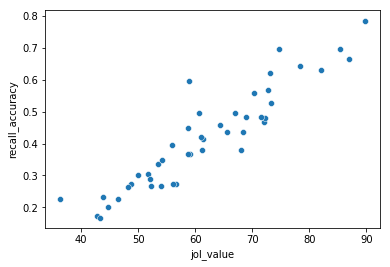

In [61]:
sns.scatterplot(x='jol_value', y='recall_accuracy', data=corr_df)

This scatter plot shows that the average JOL rating seems to be related to recall accuracy such that higher JOL ratings were given to word that were more accurately remembered.  This suggests that people have some reasonably calibrated "meta-cognition" about how well they learned something.  What is your JOL for the material in this chapter?

### The correlation coefficient

We can make these ideas a bit more explicit by introducing the idea of a **_correlation coefficient_** (or, more specifically, Pearson's correlation coefficient), which is traditionally denoted by $r$. The correlation coefficient between two variables $X$ and $Y$ (sometimes denoted $r_{XY}$), which we'll define more precisely in the next section, is a measure that varies from $-1$ to $1$. When $r = -1$ it means that we have a perfect negative relationship, and when $r = 1$ it means we have a perfect positive relationship. When $r = 0$, there's no relationship at all. If you look at {numref}`fig:corr`, you can see several plots showing what different correlations look like.

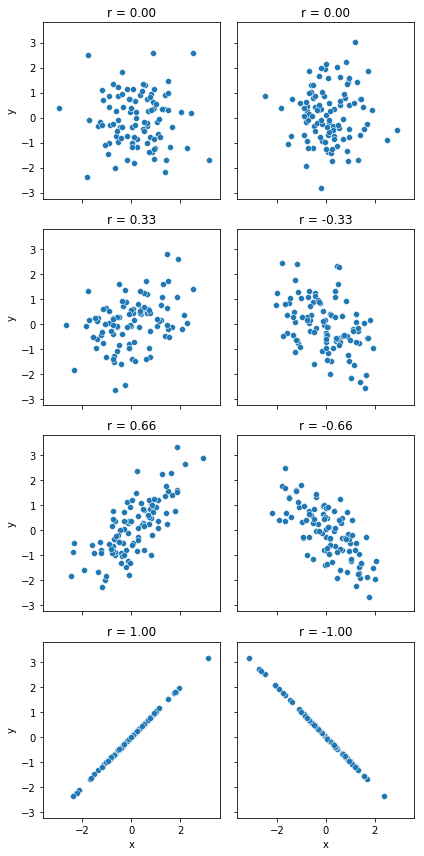

In [26]:
import numpy.random as npr
fig, ax=plt.subplots(4,2,figsize=(6,12),sharex='all', sharey='all')
axes = ax.ravel()

for idx, cor in enumerate([0,0,0.33,-0.33,0.66,-0.66,1,-1]):
    df=pd.DataFrame(npr.multivariate_normal([0,0], cov=np.array([[1,cor],[cor,1]]), size=100), columns=["x","y"] )
    sns.scatterplot(x='x', y='y',data=df,  ax=axes[idx])
    axes[idx].set_title(f"r = {cor:.2f}")
plt.tight_layout()

glue("cor_fig",fig,display=False)

```{glue:figure} cor_fig
:figwidth: 400px
:name: "fig:corr"

Illustration of the effect of varying the strength and direction of a correlation
```

The formula for the Pearson's correlation coefficient can be written in several different ways. I think the simplest way to write down the formula is to break it into two steps. Firstly, let's introduce the idea of a **_covariance_**. The covariance between two variables $X$ and $Y$ is a generalization of the notion of the variance; it's a mathematically simple way of describing the relationship between two variables that isn't terribly informative to humans:

$
\mbox{Cov}(X,Y) = \frac{1}{N-1} \sum_{i=1}^N \left( X_i - \bar{X} \right) \left( Y_i - \bar{Y} \right)
$

Because we're multiplying (i.e., taking the "product" of) a quantity that depends on $X$ by a quantity that depends on $Y$ and then averaging [^covariance], you can think of the formula for the covariance as an "average cross product" between $X$ and $Y$. The covariance has the nice property that, if $X$ and $Y$ are entirely unrelated, then the covariance is exactly zero. If the relationship between them is positive (in the sense shown in {numref}`fig:corr`) then the covariance is also positive; and if the relationship is negative then the covariance is also negative. In other words, the covariance captures the basic qualitative idea of correlation. Unfortunately, the raw magnitude of the covariance isn't easy to interpret: it depends on the units in which $X$ and $Y$ are expressed, and worse yet, the actual units that the covariance itself is expressed in are really weird. For instance, if $X$ refers to the `jol_value` variable (units: rating points on a judgement) and $Y$ refers to the `recall_accuracy` variable (units: proportion accurate), then the units for their covariance are "rating points $\times$ accuracy". And I have no freaking idea what that would even mean. 

[^covariance]: Just like we saw with the variance and the standard deviation, in practice we divide by $N-1$ rather than $N$.

The Pearson correlation coefficient $r$ fixes this interpretation problem by standardizing the covariance, in pretty much the exact same way that the $z$-score standardizes a raw score: by dividing by the standard deviation. However, because we have two variables that contribute to the covariance, the standardization only works if we divide by both standard deviations [^corsimple].  In other words, the correlation between $X$ and $Y$ can be written as follows:

$
r_{XY}  = \frac{\mbox{Cov}(X,Y)}{ \hat{\sigma}_X \ \hat{\sigma}_Y}
$

By doing this standardization, not only do we keep all of the nice properties of the covariance discussed earlier, but the actual values of $r$ are on a meaningful scale: $r= 1$ implies a perfect positive relationship, and $r = -1$ implies a perfect negative relationship. I'll expand a little more on this point later. But before I do, let's look at how to calculate correlations in R.

[^corsimple]: This is an oversimplification, but it'll do for our purposes.

### Calculating correlations in Python


There are several methods for computing the correlation coefficient in Python including using [Scipy](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html), [Numpy](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html), and [Pandas](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html).

Usually one is interested in just the regular correlation coefficient, $r$, which is easy to do with Scipy's `pearsonr` command:

```{python}
import scipy.stats as stats
stats.pearsonr( x = corr_df['jol_value'], y = corr_df['recall_accuracy'] )
```

You simply specify the vector of numbers to use as x and y and the function returns a tuple. The first is the pearson $r$ value and the second is the $p$-value from a hypothesis test that the correlation coefficient is greater than 0 (a future chapter will go more deeply into the logic of hypothesis testing).

However, there is also a `corr()` function available as a dataframe method in Pandsa that is a bit more powerful than this simple example suggests. For example, you can also calculate a complete "correlation matrix", between all pairs of variables in the data frame:


```{python}
# correlate all pairs of variables in "corr_df" dataframe:
corr_df.corr()  
```

In [36]:
import scipy.stats as stats
stats.pearsonr( x = corr_df['jol_value'], y = corr_df['recall_accuracy'] )

(0.9274668603778027, 5.528157257418477e-20)

In [37]:
corr_df.corr()

,jol_value,recall_accuracy
jol_value,1.000000,0.927467
recall_accuracy,0.927467,1.000000


### Interpreting a correlation
 
Naturally, in real life you don't see many correlations of 1. So how should you interpret a correlation of, say $r= .4$? The honest answer is that it really depends on what you want to use the data for, and on how strong the correlations in your field tend to be. A friend of mine in engineering once argued that any correlation less than $.95$ is completely useless (I think he was exaggerating, even for engineering). On the other hand there are real cases -- even in psychology -- where you should really expect correlations that strong. For instance, one of the benchmark data sets used to test theories of how people judge similarities is so clean that any theory that can't achieve a correlation of at least $.9$ really isn't deemed to be successful. However, when looking for (say) elementary correlates of intelligence (e.g., inspection time, response time), if you get a correlation above $.3$ you're doing very very well. In short, the interpretation of a correlation depends a lot on the context. 

However, something that can never be stressed enough is that you should *always* look at the scatterplot before attaching any interpretation to the data. A correlation might not mean what you think it means (see above).

### Spearman's rank correlations

The Pearson correlation coefficient is useful for a lot of things, but it does have shortcomings. One issue in particular stands out: what it actually measures is the strength of the *linear* relationship between two variables. In other words, what it gives you is a measure of the extent to which the data all tend to fall on a single, perfectly straight line. Often, this is a pretty good approximation to what we mean when we say "relationship", and so the Pearson correlation is a good thing to calculation. Sometimes, it isn't. 

One very common situation where the Pearson correlation isn't quite the right thing to use arises when an increase in one variable $X$ really is reflected in an increase in another variable $Y$, but the nature of the relationship isn't necessarily linear. An example of this might be the relationship between effort and reward when studying for an exam. If you put in zero effort ($X$) into learning a subject, then you should expect a grade of 0% ($Y$). However, a little bit of effort will cause a *massive* improvement: just turning up to lectures means that you learn a fair bit, and if you just turn up to classes, and scribble a few things down so your grade might rise to 35%, all without a lot of effort. However, you just don't get the same effect at the other end of the scale. As everyone knows, it takes *a lot* more effort to get a grade of 90% than it takes to get a grade of 55%. What this means is that, if I've got data looking at study effort and grades, there's a pretty good chance that Pearson correlations will be misleading. 



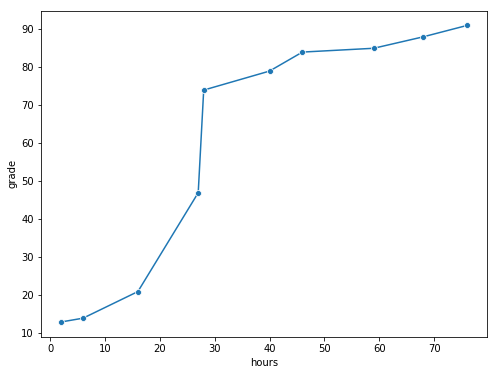

In [53]:
grades_df=pd.DataFrame({'hours':[2,76,40,6,16,28,27,59,46,68],'grade':[13,91,79,14,21,74,47,85,84,88]})
fig,ax=plt.subplots(figsize=(8,6))
sns.lineplot(x='hours',y='grade',data=grades_df,marker='o',ax=ax)
glue("grades_fig",fig,display=False)

```{glue:figure} grades_fig
:figwidth: 600px
:name: "fig:grades"

The relationship between hours worked and grade received, for a toy data set consisting of only 10 students (each circle corresponds to one student). The dashed line through the middle shows the linear relationship between the two variables. This produces a strong Pearson correlation of $r = .91$. However, the interesting thing to note here is that there's actually a perfect monotonic relationship between the two variables: in this toy example at least, increasing the hours worked always increases the grade received, as illustrated by the solid line. This is reflected in a Spearman correlation of $rho = 1$. With such a small data set, however, it's an open question as to which version better describes the actual relationship involved. 
``

To illustrate, consider the data plotted in {numref}`fig:grades`, showing the relationship between hours worked and grade received for 10 students taking some class. The curious thing about this -- highly fictitious -- data set is that increasing your effort *always* increases your grade. It might be by a lot or it might be by a little, but increasing effort will never decrease your grade. 

The raw data look like this:

In [54]:
grades_df

,hours,grade
0,2,13
1,76,91
2,40,79
3,6,14
4,16,21
5,28,74
6,27,47
7,59,85
8,46,84
9,68,88


If we run a standard Pearson correlation, it shows a strong relationship between hours worked and grade received,

In [59]:
print("r =", stats.pearsonr(grades_df['hours'], grades_df['grade'])[0])

r = 0.9094019658612522


but this doesn't actually capture the observation that increasing hours worked *always* increases the grade. There's a sense here in which we want to be able to say that the correlation is *perfect* but for a somewhat different notion of what a "relationship" is. What we're looking for is something that captures the fact that there is a perfect **_ordinal relationship_** here. That is, if student 1 works more hours than student 2, then we can guarantee that student 1 will get the better grade. That's not what a correlation of $r = .91$ says at all.

How should we address this? Actually, it's really easy: if we're looking for ordinal relationships, all we have to do is treat the data as if it were ordinal scale! So, instead of measuring effort in terms of "hours worked", lets rank all 10 of our students in order of hours worked. That is, student 1 did the least work out of anyone (2 hours) so they get the lowest rank (rank = 1). Student 4 was the next laziest, putting in only  6 hours of work in over the whole semester, so they get the next lowest rank (rank = 2). Notice that I'm using "rank =1" to mean "low rank". Sometimes in everyday language we talk about "rank = 1" to mean "top rank" rather than "bottom rank". So be careful: you can rank "from smallest value to largest value" (i.e., small equals rank 1) or you can rank "from largest value to smallest value" (i.e., large equals rank 1). In this case, I'm ranking from smallest to largest, because that's the default way that Python does it. But in real life, it's really easy to forget which way you set things up, so you have to put a bit of effort into remembering! 

Okay, so let's have a look at our students when we rank them from worst to best in terms of effort and reward: 

In [63]:
grades_df['rank_grade']=grades_df['grade'].rank()
grades_df['rank_hours']=grades_df['hours'].rank()
grades_df

,hours,grade,rank_grade,rank_hours
0,2,13,1.0,1.0
1,76,91,10.0,10.0
2,40,79,6.0,6.0
3,6,14,2.0,2.0
4,16,21,3.0,3.0
5,28,74,5.0,5.0
6,27,47,4.0,4.0
7,59,85,8.0,8.0
8,46,84,7.0,7.0
9,68,88,9.0,9.0


Hm. These two new columns are *identical*. The student who put in the most effort got the best grade, the student with the least effort got the worst grade, etc. (We used Pandas' `.rank()` method to rank each column and assign it to a new column of the data frame.

As the table above shows, these two rankings are identical, so if we now correlate them we get a perfect relationship:

In [64]:
print("r =", stats.pearsonr(grades_df['rank_hours'], grades_df['rank_grade'])[0])

r = 1.0


What we've just re-invented is **_Spearman's rank order correlation_**, usually denoted $\rho$ to distinguish it from the Pearson correlation $r$. We can calculate Spearman's $\rho$ using Python also uses the Scipy stats library `spearmanr()` method:

In [65]:
print("r =", stats.spearmanr(grades_df['rank_hours'], grades_df['rank_grade'])[0])

r = 0.9999999999999999


## Summary

In this chapter you received a refresher on descriptive statistics and an overview of how to compute descriptive statistics using Python.  The key ideas are about being careful to choose the right descriptive statistics to summarize you data without hiding too much of the reality of the data from your audience.  In most cases, reporting descriptive statistics should go hand in hand with data visualization techniques considered in the previous chapter.

## References

```{bibliography} ../../references.bib
:filter: docname in docnames
```